In [19]:
import _config

In [20]:
import imp
imp.reload(_config)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Identifier number, dtype: int64


<module '_config' from '/data/cgs/bh0085/prj/reduced_all/reduced_1219/src/_config.py'>

In [21]:
'''
Create figures for reduced library analysis
'''

import os, sys
import pandas as pd
import numpy as np
sys.path.append("/cluster/bh0085")
from mybio import util
from _config import REDUCED_LIB, SEQUENCING_INFO, OUT_PLACE, PRJ_NAME, DATESTR, FIGS_PLACE
import _config

from scipy.stats import entropy
import scipy.stats as stats


import matplotlib.pyplot as plt
%matplotlib inline

DEFAULT_INP_DIR = _config.OUT_PLACE + 'f1_agg_reports/'

if not "__file__" in vars(): __file__="f_test"
NAME = util.get_fn(__file__)
FIG_DIR = os.path.join(FIGS_PLACE, NAME)
util.ensure_dir_exists(FIG_DIR)


results = pd.read_csv(os.path.join(DEFAULT_INP_DIR,f"{PRJ_NAME}_all_results.csv"),index_col=0)
agg_results = pd.read_csv(os.path.join(DEFAULT_INP_DIR,f"{PRJ_NAME}_aggregate_stats.csv"),index_col=0)
lib_results = pd.read_csv(os.path.join(DEFAULT_INP_DIR,f"{PRJ_NAME}_library_stats.csv"),index_col=0)


In [68]:
stacked_outcomes = results.groupby(["_Experiment","sample_name","Category"]).Count.sum().unstack("Category")[["ins","del","wildtype"]].fillna(0)
stacked_outcomes.to_csv("../out/f3_stacked_categorical_outcomes.csv")



In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stacked_outcomes = results.groupby(["_Experiment","sample_name","Category"]).Count.sum().unstack("Category")[["ins","del"]].fillna(0)
stacked_outcomes.to_csv("../out/f3_stacked_categorical_outcomes.csv")



In [67]:
ins_rate_unstacked = (stacked_outcomes["ins"] / stacked_outcomes.sum(axis=1)).unstack().T
ins_rate_unstacked.to_csv("../out/f3_ins_rate_grid_outcomes.csv")

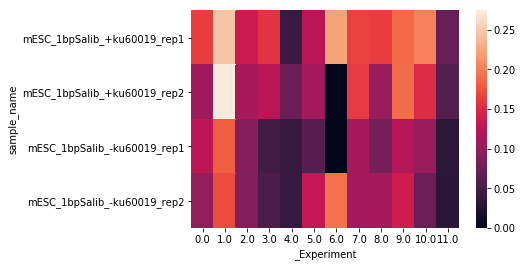

In [75]:
sns.heatmap(ins_rate_crispr_unstacked)

In [74]:
ins_rate_crispr_unstacked.sum(axis=1)

sample_name
mESC_1bpSalib_+ku60019_rep1    1.891671
mESC_1bpSalib_+ku60019_rep2    1.476511
mESC_1bpSalib_-ku60019_rep1    1.009859
mESC_1bpSalib_-ku60019_rep2    1.252963
dtype: float64

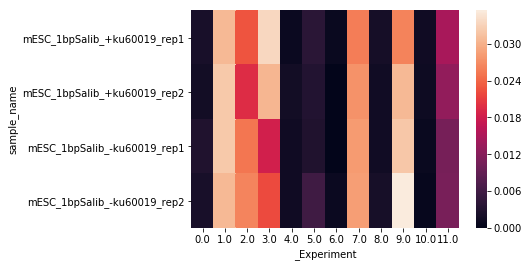

In [60]:
sns.heatmap(ins_rate_unstacked)

In [61]:
ins_rate_unstacked

_Experiment,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
sample_name,,,,,,,,,,,,
mESC_1bpSalib_+ku60019_rep1,0.002229,0.030754,0.022718,0.033510,0.001014,0.003881,0.000902,0.025862,0.002008,0.026299,0.001406,0.014683
mESC_1bpSalib_+ku60019_rep2,0.001697,0.032135,0.019783,0.030494,0.001731,0.003314,0.000000,0.027459,0.001585,0.030731,0.001321,0.012878
mESC_1bpSalib_-ku60019_rep1,0.002909,0.032159,0.025221,0.018318,0.001448,0.003041,0.000000,0.028157,0.001595,0.032079,0.000958,0.010771
mESC_1bpSalib_-ku60019_rep2,0.002287,0.030760,0.026337,0.022104,0.001459,0.005941,0.000980,0.028506,0.002192,0.035435,0.000647,0.010830


In [26]:
all_results.groupby("_Experiment","")

,n_ins,n_all_del,n_mh_del,n_non_mh_del,n_cas9_total,n_wildtype,n_other,n_total,n_total_mapped,frac_non_mh_del_of_crispr,...,predicted_del_of_crispr,predicted_ins_of_crispr,predicted_mhdel_of_crispr,predicted_non_mhdel_of_crispr,predicted_precision,deletion_length_r,deletion_length_pval,Description,drug_name,replicate
_Experiment,,,,,,,,,,,,,,,,,,,,,
0.0,602.0,3921.0,776.0,798.0,4523.0,271702.0,77994.0,354219.0,276225.0,0.176432,...,0.826340,0.173660,0.826340,0.0,0.484847,0.299957,0.198826,NaN,NaN,NaN
1.0,2201.0,7294.0,3081.0,289.0,9495.0,60882.0,57135.0,127512.0,70377.0,0.030437,...,0.854285,0.145715,0.854285,0.0,0.393130,0.273574,0.243164,NaN,NaN,NaN
2.0,451.0,3435.0,1942.0,175.0,3886.0,16003.0,24039.0,43928.0,19889.0,0.045033,...,0.821822,0.178178,0.821822,0.0,0.482642,0.539347,0.014121,NaN,NaN,NaN
3.0,588.0,4632.0,2936.0,400.0,5220.0,14596.0,13577.0,33393.0,19816.0,0.076628,...,0.917899,0.082101,0.917899,0.0,0.376179,0.288805,0.216853,NaN,NaN,NaN
4.0,65.0,1284.0,76.0,682.0,1349.0,48398.0,11024.0,60771.0,49747.0,0.505560,...,0.846881,0.153119,0.846881,0.0,0.485322,0.072247,0.762128,NaN,NaN,NaN
5.0,291.0,2254.0,1049.0,69.0,2545.0,71878.0,64235.0,138658.0,74423.0,0.027112,...,0.861679,0.114827,0.861679,0.0,0.500014,0.145545,0.540366,NaN,NaN,NaN
6.0,20.0,129.0,0.0,0.0,149.0,33719.0,11958.0,45826.0,33868.0,0.000000,...,0.844854,0.155146,0.844854,0.0,0.481428,0.088711,0.709955,NaN,NaN,NaN
7.0,2296.0,13267.0,928.0,1699.0,15563.0,69849.0,66149.0,151561.0,85412.0,0.109169,...,0.866258,0.133742,0.866258,0.0,0.441796,0.443011,0.050436,NaN,NaN,NaN
8.0,166.0,1145.0,27.0,97.0,1311.0,86901.0,25669.0,113881.0,88212.0,0.073989,...,0.854384,0.145616,0.854384,0.0,0.363749,0.744143,0.000169,NaN,NaN,NaN


In [22]:
results.loc[lambda x: x._Experiment == 11]

,Category,Count,Genotype Position,Indel with Mismatches,Ins Fivehomopolymer,Ins Template Length,Ins Template Orientation,Ins mh2,Ins p2,Inserted Bases,...,Microhomology-Based,_ExpDir,_Experiment,_Sequence Context,_Cutsite,sample_name,metacat,Description,drug_name,replicate
3958,pcr_recombination,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3959,poormatches,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3960,del_notcrispr,2.0,-23.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3961,del_notcrispr,1.0,-23.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3962,del_notcrispr,1.0,-21.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3963,del_notcrispr,7.0,-19.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3964,del_notcrispr,1.0,-19.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3965,del_notcrispr,12.0,-17.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3966,del_notcrispr,6.0,-16.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1
3967,del_notcrispr,2.0,-15.0,no,NaN,NaN,NaN,NaN,NaN,NaN,...,na,/data/cgs/bh0085/prj/reduced_all/reduced_1219/...,11.0,GTTTACTAGCTGGCCTTATATTTGGACTGTGACTGTGGTCCTGAGA...,34,mESC_1bpSalib_-ku60019_rep1,other,-ku60019,1bpSalib_-ku60019,1


In [10]:
agg_results.n_other.sum()

1382924.0

In [11]:
agg_results.n_all_del.sum()

30.0

In [12]:
agg_results

,n_ins,n_all_del,n_mh_del,n_non_mh_del,n_cas9_total,n_wildtype,n_other,n_total,n_total_mapped,frac_non_mh_del_of_crispr,frac_mh_del_of_crispr,frac_del_of_crispr,frac_ins_of_crispr,frac_crispr_of_mapped,Description,drug_name,replicate
sample_name,,,,,,,,,,,,,,,,,
mESC_1bpSalib_+ku60019_rep1,12.0,24.0,7.0,17.0,36.0,2289.0,687271.0,689596.0,2325.0,0.472222,0.194444,0.666667,0.333333,0.015484,+ku60019,1bpSalib_-ku60019,1
mESC_1bpSalib_+ku60019_rep2,1.0,3.0,2.0,1.0,4.0,920.0,343523.0,344447.0,924.0,0.250000,0.500000,0.750000,0.250000,0.004329,+ku60019,1bpSalib_-ku60019,2
mESC_1bpSalib_-ku60019_rep1,1.0,2.0,0.0,2.0,3.0,402.0,151663.0,152068.0,405.0,0.666667,0.000000,0.666667,0.333333,0.007407,-ku60019,1bpSalib_-ku60019,1
mESC_1bpSalib_-ku60019_rep2,0.0,1.0,1.0,0.0,1.0,479.0,200467.0,200947.0,480.0,0.000000,1.000000,1.000000,0.000000,0.002083,-ku60019,1bpSalib_-ku60019,2


In [16]:
good_samples = SEQUENCING_INFO.set_index("Name").loc[agg_results.loc[(agg_results.n_total_mapped > 100000)].index]
all_drug_names = good_samples.drug_name.unique()
oneoff_drug_names = []#(good_samples.drug_name.value_counts().rename("replicated").rename_axis("drug_name",axis="index") == 1).reset_index().set_index("replicated").loc[True].drug_name.unique()
replicated_drug_names = (good_samples.drug_name.value_counts().rename("replicated").rename_axis("drug_name",axis="index") > 1).reset_index().set_index("replicated").loc[True].drug_name.unique()


In [17]:
len(all_drug_names)

23

f_test:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
f_test:42: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


Text(0.5, 0, '% insertions, difference b/w repA & repB')

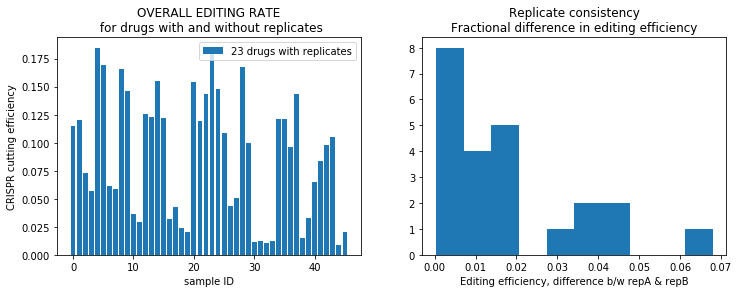

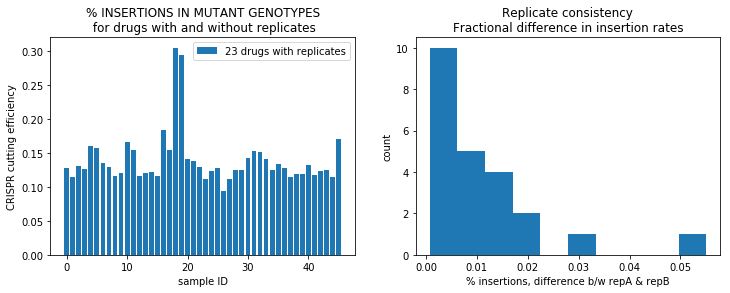

In [22]:

f, subs = plt.subplots(1,2)
f.set_size_inches(12,4)

ax = subs[0]
plt.sca(ax)

n_rep = len(replicated_drug_names)

plot_agg_results = agg_results.loc[SEQUENCING_INFO.Name].sort_values("drug_name").reset_index()

plt.bar(plot_agg_results.loc[plot_agg_results.drug_name.isin(replicated_drug_names)].index,
        plot_agg_results.loc[plot_agg_results.drug_name.isin(replicated_drug_names)].frac_crispr_of_mapped,
       label=f"{len(replicated_drug_names)} drugs with replicates")

#plt.bar(plot_agg_results.loc[plot_agg_results.drug_name.isin(oneoff_drug_names)].index,
#        plot_agg_results.loc[plot_agg_results.drug_name.isin(oneoff_drug_names)].frac_crispr_of_mapped,
#       label = f"{len(oneoff_drug_names)} drugs missing replicates")

ax.set_title("OVERALL EDITING RATE\n for drugs with and without replicates")
ax.set_xlabel("sample ID")
ax.set_ylabel("CRISPR cutting efficiency")
plt.legend()

ax = subs[1]
plt.sca(ax)
ax.hist(agg_results.loc[agg_results.drug_name.isin(replicated_drug_names)].groupby("drug_name").apply(
    lambda x:abs(x.frac_crispr_of_mapped.iloc[0] - x.frac_crispr_of_mapped.iloc[1])))
ax.set_xlabel("Editing efficiency, difference b/w repA & repB")
ax.set_title("Replicate consistency\nFractional difference in editing efficiency")



f, subs = plt.subplots(1,2)
f.set_size_inches(12,4)

ax = subs[0]
plt.sca(ax)

n_rep = len(replicated_drug_names)

plot_agg_results = agg_results.loc[SEQUENCING_INFO.Name].sort_values("drug_name").reset_index()

plt.bar(plot_agg_results.loc[plot_agg_results.drug_name.isin(replicated_drug_names)].index,
        plot_agg_results.loc[plot_agg_results.drug_name.isin(replicated_drug_names)].frac_ins_of_crispr,
       label=f"{len(replicated_drug_names)} drugs with replicates")

#plt.bar(plot_agg_results.loc[plot_agg_results.drug_name.isin(oneoff_drug_names)].index,
#        plot_agg_results.loc[plot_agg_results.drug_name.isin(oneoff_drug_names)].frac_ins_of_crispr,
#       label = f"{len(oneoff_drug_names)} drugs missing replicates")

ax.set_title("% INSERTIONS IN MUTANT GENOTYPES\n for drugs with and without replicates")
ax.set_xlabel("sample ID")
ax.set_ylabel("CRISPR cutting efficiency")
plt.legend()

ax = subs[1]
plt.sca(ax)


ax.hist(agg_results.loc[agg_results.drug_name.isin(replicated_drug_names)].groupby("drug_name").apply(
    lambda x:abs(x.frac_ins_of_crispr.iloc[0] - x.frac_ins_of_crispr.iloc[1])))

ax.set_title("Replicate consistency\nFractional difference in insertion rates")
ax.set_ylabel("count")
ax.set_xlabel("% insertions, difference b/w repA & repB")



NameError: name 'drug_library_results' is not defined

In [25]:
#load indelphi genotypes for comparison
id_genos = pd.read_csv(os.path.join(OUT_PLACE,"f0_py2_write_indelphi_genotypes/indelphi_genotypes.csv"))
drug_library_results = pd.DataFrame()

for k,guide in REDUCED_LIB.iterrows():
    print(k)
    for drug in all_drug_names:
        pred_df = id_genos.loc[(id_genos.celltype=="mESC") & (id_genos.libid==k) ]
        
        res = pd.Series()

        crispr_results = results.loc[(results._Experiment == k ) 
                                     & (results.Category.isin(["ins","del"]))
                                    & (results.drug_name==drug)]
        fracs = crispr_results.groupby(["Category","Length"]).Count.sum() / crispr_results.Count.sum()
        observed_precision = 1 - entropy(fracs) / np.log(len(fracs))
        res["observed_precision"] = observed_precision
        
        overall_precision = 1 - entropy(pred_df['Predicted frequency']) / np.log(len(pred_df))
        highest_fq = max(pred_df['Predicted frequency'])
        highest_del_fq = max(pred_df[pred_df['Category'] == 'del']['Predicted frequency'])/100
        highest_ins_fq = max(pred_df[pred_df['Category'] == 'ins']['Predicted frequency'])/100

        # Outcomes
        ins_fq = sum(pred_df[pred_df['Category'] == 'ins']['Predicted frequency']) / 100
        crit = (pred_df['Category'] == 'del') & (pred_df['Genotype position'] != 'e')
        mhdel_fq = sum(pred_df[crit]['Predicted frequency']) / 100

        crit = (pred_df['Category'] == 'del') & (pred_df['Genotype position'] == 'e')
        nomhdel_fq = sum(pred_df[crit]['Predicted frequency']) / 100

        
        res["predicted_del_of_crispr"] = mhdel_fq + nomhdel_fq
        res["predicted_ins_of_crispr"] = ins_fq
        res["predicted_mhdel_of_crispr"] = mhdel_fq
        res["predicted_non_mhdel_of_crispr"] = nomhdel_fq
        res["predicted_precision"] = overall_precision
        
        deletion_lengths = pd.DataFrame(pred_df.loc[pred_df.Category == "del"].groupby("Length")["Predicted frequency"].sum().rename("predicted_freq"))
        for k2,row in deletion_lengths.iterrows():
            deletion_lengths.at[k2,"observed_freq"] = crispr_results.loc[crispr_results.Length==k2].Count.sum()
        deletion_lengths = deletion_lengths.loc[:20].fillna(0)
        
        deletion_length_r,pval = stats.pearsonr(deletion_lengths.predicted_freq,deletion_lengths.observed_freq)
        res["deletion_length_r"] = deletion_length_r
        res["deletion_length_pval"] = pval
        res["libid"] = k
        res["drug"] = drug
        
        drug_library_results = drug_library_results.append(res,ignore_index=True)

drug_library_results = drug_library_results.set_index(["libid","drug"])

0


/cluster/bh0085/anaconda27/envs/py3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


1
2
3
4
5
6
7
8
9


f_test:16: RuntimeWarning: invalid value encountered in double_scalars
f_test:16: RuntimeWarning: divide by zero encountered in log
/cluster/bh0085/anaconda27/envs/py3/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [26]:

drug_results = plot_agg_results.set_index("sample_name").loc[good_samples.index].groupby("drug_name").mean()[["frac_non_mh_del_of_crispr","frac_mh_del_of_crispr","frac_del_of_crispr","frac_ins_of_crispr","frac_crispr_of_mapped"]]
drug_results = drug_results.sort_values("frac_crispr_of_mapped",ascending=False)
drug_results["avg_indelphi_pearson_fit"]= drug_library_results.reset_index().groupby("drug").apply(lambda x:x.deletion_length_r.mean())
drug_results["avg_precision"]= drug_library_results.reset_index().groupby("drug").apply(lambda x:x.deletion_length_r.mean())
drug_results.to_csv("../out/f1_agg_reports/REDUCEDLIB_SMALLMOL_May2019_drug_data.csv")




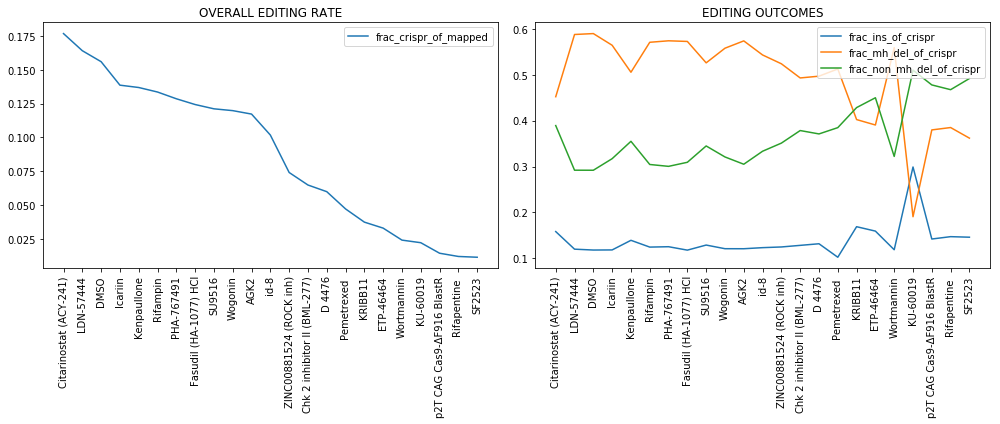

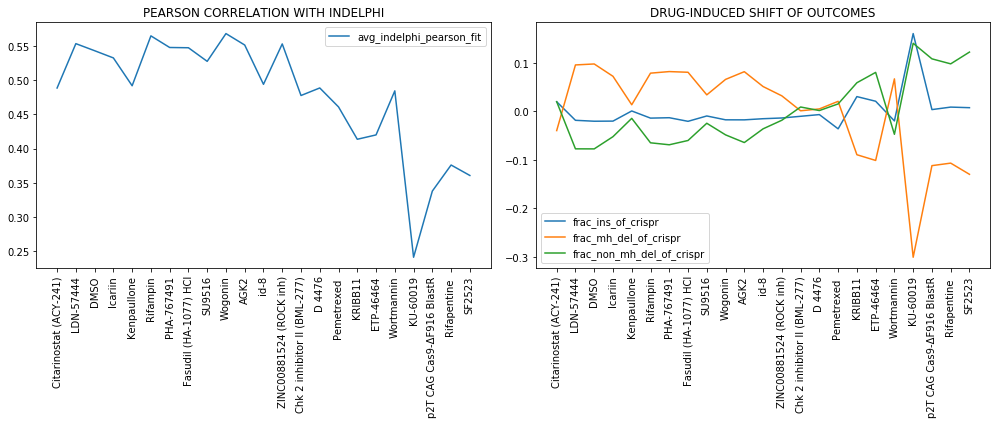

In [27]:
f,subs = plt.subplots(1,2)
f.set_size_inches(14,6)


ax = subs[0]
plt.sca(ax)
ax.plot(drug_results.frac_crispr_of_mapped)

plt.legend()
ax.set_title("OVERALL EDITING RATE")
ax.set_xticklabels(drug_results.frac_crispr_of_mapped.index,rotation=90)

ax = subs[1]
plt.sca(ax)
ax.set_title("EDITING OUTCOMES")
ax.plot(drug_results.frac_ins_of_crispr)
ax.plot(drug_results.frac_mh_del_of_crispr)
ax.plot(drug_results.frac_non_mh_del_of_crispr)

plt.legend()

ax.set_xticklabels(drug_results.frac_crispr_of_mapped.index,rotation=90)

print("")
plt.tight_layout()


mean_mh = drug_results.frac_mh_del_of_crispr.mean()
mean_nmh = drug_results.frac_non_mh_del_of_crispr.mean()
mean_ins = drug_results.frac_ins_of_crispr.mean()

f,subs = plt.subplots(1,2)
f.set_size_inches(14,6)


ax = subs[0]
plt.sca(ax)
plt.plot()
ax.set_title("PEARSON CORRELATION WITH INDELPHI")
plt.plot(drug_results.avg_indelphi_pearson_fit)
ax.set_xticklabels(drug_results.frac_crispr_of_mapped.index,rotation=90)
ax.legend()

ax = subs[1]
plt.sca(ax)
ax.set_title("DRUG-INDUCED SHIFT OF OUTCOMES")
ax.plot(drug_results.frac_ins_of_crispr-mean_ins)
ax.plot(drug_results.frac_mh_del_of_crispr - mean_mh)
ax.plot(drug_results.frac_non_mh_del_of_crispr - mean_nmh)

plt.legend()
ax.set_xticklabels(drug_results.frac_crispr_of_mapped.index,rotation=90)

print("")
plt.tight_layout()


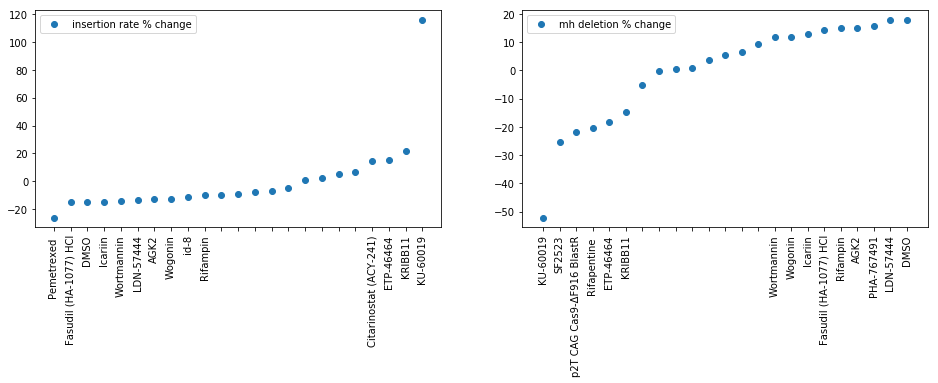

In [28]:
mean_mh_fraction = (drug_results.frac_mh_del_of_crispr / (drug_results.frac_mh_del_of_crispr+drug_results.frac_non_mh_del_of_crispr)).mean()
mean_ins_fraction = drug_results.frac_ins_of_crispr.mean()
ins_percent_change = (drug_results.frac_ins_of_crispr - mean_ins_fraction) / mean_ins_fraction*100
mh_percent_change = ((drug_results.frac_mh_del_of_crispr/(drug_results.frac_mh_del_of_crispr+drug_results.frac_non_mh_del_of_crispr)) - mean_mh_fraction) / mean_mh_fraction*100

f,subs = plt.subplots(1,2)
f.set_size_inches(16,4)

ax = subs[0]
plt.sca(ax)
ins_srt = ins_percent_change.sort_values().rename("insertion rate % change")
ax.scatter(ins_srt.reset_index()["insertion rate % change"].index,ins_srt.reset_index()["insertion rate % change"])
ax.set_xticks(ins_srt.reset_index().index)
ax.set_xticklabels(ins_srt.reset_index().apply(lambda x:x.drug_name if (abs(x["insertion rate % change"]) >10 ) else "",axis=1) ,rotation=90)

plt.legend()

ax=subs[1]
plt.sca(ax)
mh_srt = mh_percent_change.sort_values().rename("mh deletion % change")
ax.set_xticks(mh_srt.reset_index().index)
ax.scatter(mh_srt.reset_index()["mh deletion % change"].index,mh_srt.reset_index()["mh deletion % change"])

plt.legend()
ax.set_xticklabels(mh_srt.reset_index().apply(lambda x:x.drug_name if (abs(x["mh deletion % change"]) >10 ) else "",axis=1) ,rotation=90)

print("")

In [29]:
res

observed_precision               0.278344
predicted_del_of_crispr          0.874098
predicted_ins_of_crispr          0.125902
predicted_mhdel_of_crispr        0.874098
predicted_non_mhdel_of_crispr           0
predicted_precision              0.437435
deletion_length_r                 0.32464
deletion_length_pval             0.162559
libid                                  47
drug                               SF2523
dtype: object

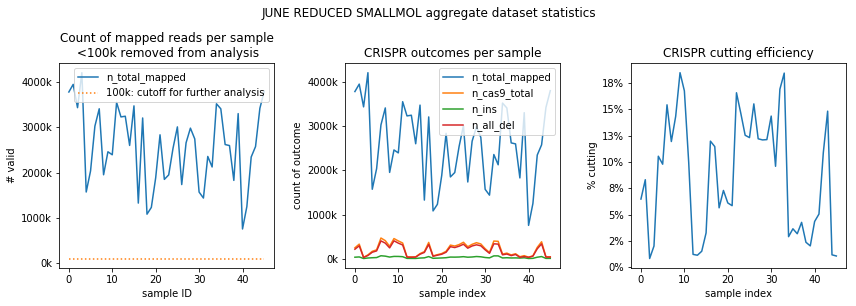

In [30]:
import matplotlib.ticker as ticker

plotting_results = agg_results.copy().reset_index()
plotting_results = plotting_results.loc[plotting_results.n_total_mapped>100000]

f,subs = plt.subplots(1,3)
f.set_size_inches(12,4)
f.suptitle("JUNE REDUCED SMALLMOL aggregate dataset statistics",x=.5,y=1.05)


plt.sca(subs[0])
ax = plt.gca()
ax.set_title("Count of mapped reads per sample\n <100k removed from analysis")
ax.plot(agg_results.n_total_mapped, )
ax.plot(agg_results.index,agg_results.n_total_mapped*0 + 100000,":",label="100k: cutoff for further analysis")
ax.set_xlabel("sample ID")
ax.set_ylabel("# valid")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:f"{x/1000:.00f}k"))

ax.set_xticks(agg_results.reset_index().loc[::10].index)
ax.set_xticklabels(agg_results.reset_index().loc[::10].index)

plt.legend()
        
plt.sca(subs[1])
ax = plt.gca()
ax.plot(plotting_results.n_total_mapped)
ax.plot(plotting_results.n_cas9_total)
ax.plot(plotting_results.n_ins)
ax.plot(plotting_results.n_all_del)

ax.set_ylabel("count of outcome")
ax.set_xlabel("sample index")
ax.set_title("CRISPR outcomes per sample")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:f"{x/1000:.00f}k"))

plt.legend()

#ax.set_xticks([])

plt.sca(subs[2])
ax = plt.gca()
ax.plot(plotting_results.frac_crispr_of_mapped, label="")

ax.set_title("CRISPR cutting efficiency")
ax.set_ylabel("% cutting")
ax.set_xlabel("sample index")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:f"{x*100:.00f}%"))

plt.tight_layout()

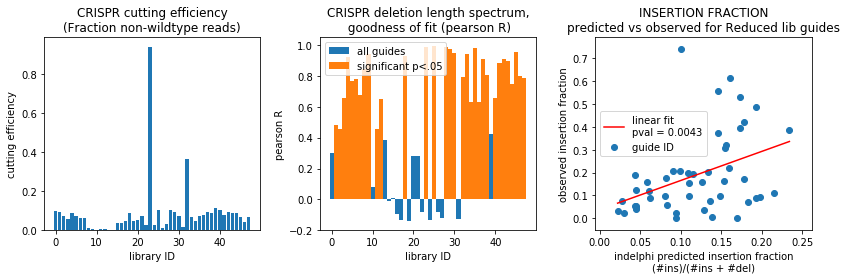

In [31]:

f,subs = plt.subplots(1,3)
f.set_size_inches(12,4)

plt.sca(subs[0])
ax = plt.gca()
plt.bar(lib_results.index,lib_results.frac_crispr_of_mapped)
ax.set_title("CRISPR cutting efficiency\n(Fraction non-wildtype reads)")
ax.set_ylabel("cutting efficiency")
ax.set_xlabel("library ID")
ax.set_xticks(lib_results[::10].index)

plt.sca(subs[1])
ax = plt.gca()

plt.bar(lib_results.index, lib_results.deletion_length_r,1, label="all guides")
significant = lib_results.loc[lib_results.deletion_length_pval < .05]
plt.bar(significant.index, significant.deletion_length_r,1,label="significant p<.05")
ax.set_xticks(lib_results[::10].index)

plt.legend()

#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.bar(lib_results.index+.5,np.min([-1* np.log10(lib_results.deletion_length_pval),-log10(.001)],.3,color="red")


ax.set_title("CRISPR deletion length spectrum,\n goodness of fit (pearson R)")
ax.set_ylabel("pearson R")
ax.set_xlabel("library ID")


plt.sca(subs[2])
x = lib_results.predicted_ins_of_crispr
y = lib_results.frac_ins_of_crispr.fillna(0)


gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.scatter(x,y,label="guide ID")
plt.plot(x1,y1,'-r',label=f"linear fit\npval = {p_value:0.03}")

plt.savefig(os.path.join(FIG_DIR,"fig1_cutting_efficiency.png"))

ax = plt.gca()
ax.set_xlabel("indelphi predicted insertion fraction\n(#ins)/(#ins + #del)")
ax.set_ylabel("observed insertion fraction")
ax.set_title("INSERTION FRACTION\npredicted vs observed for Reduced lib guides")
plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(FIG_DIR,"fig2_library_stats.png"))
